In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter as fsf
from plots.mpltoolkit import named_colors, fancy_legend, mpl_loc, markers, load_mpl_presets
# from scipy.integrate import quad
import numpy as np
import vice
import sys
import os
print(sys.version_info)
load_mpl_presets()

sys.version_info(major=3, minor=10, micro=2, releaselevel='final', serial=0)


/Users/astrobeard/Work/Research/VICErepos/VICE/vice/__init__.py:138: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [2]:
def miller_scalo_1979(mass):
    if mass < 1:
        return 1
    else:
        return mass**-2.3

In [3]:
class scalo_1986(vice.toolkit.interpolation.interp_scheme_1d):
    
    LOGM = [-1.06, -0.96, -0.85, -0.75, -0.65, -0.54, -0.44, -0.35,
            -0.27, -0.21, -0.14, -0.08, -0.01, 0.07, 0.16, 0.27, 0.40,
            0.54, 0.72, 0.90, 1.08, 1.26, 1.43, 1.62, 1.80]
    LOGXI = [1.06, 1.38, 1.65, 1.85, 1.88, 1.88, 1.88, 1.83, 1.70, 1.59,
             1.50, 1.59, 1.46, 1.46, 1.25, 0.87, 0.65, 0.29, -0.02, 0.31,
             -0.61, -1.03, -1.26, -1.44, -1.76]
    
    def __init__(self):
        super().__init__(self.LOGM, self.LOGXI)
        
    def __call__(self, mass):
        logm = np.log10(mass)
        return 10**super().__call__(logm) / mass
    
scalo_1986 = scalo_1986()

In [4]:
def chabrier_2003(mass):
    return chabrier_2003_individual(mass) + chabrier_2003_binaries(mass)

def chabrier_2003_individual(mass):
    if mass <= 1:
        return 0.158 / (np.log(10) * mass) * np.exp(
            -(np.log10(mass) - np.log10(0.08))**2 / (2 * 0.69**2)
        )
    else:
        return mass**-2.3 * chabrier_2003_individual(1)

def chabrier_2003_binaries(mass):
    if mass <= 1:
        return 0.086 / (np.log(10) * mass) * np.exp(
            -(np.log10(mass) - np.log10(0.22))**2 / (2 * 0.57**2)
        )
    else:
        return mass**-2.3 * chabrier_2003_binaries(1)

### From Parravano, McKee & Hollenbach (2011), ApJ, 726, 27, section 2.2.2:

For high-mass stars, [the Scalo (1986)] IMF was neither corrected for the time these stars remain obscured by their parent clouds, nor for the necessity of including the largest OB associations, which are very rare (Parravano et al. 2009), in order to obtain a fair sample of massive stars; as a result, this IMF is expected to be deficient in high-mass stars.

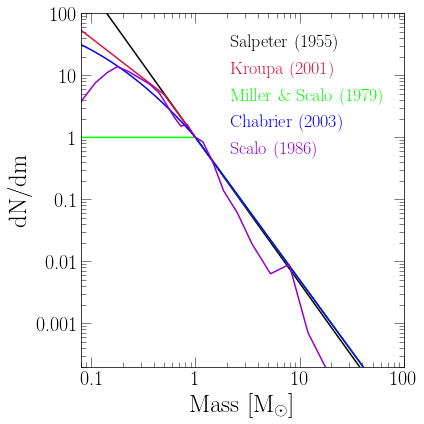

In [10]:
fig = plt.figure(figsize = (6, 6), facecolor = "white")
ax = fig.add_subplot(111)
ax.set_xlabel(r"Mass [M$_\odot$]", fontsize = 25)
ax.set_ylabel(r"dN/dm", fontsize = 25)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([0.08, 100])
ax.set_ylim([2e-4, 1e2])
ax.set_yticks([10**_ for _ in range(-3, 3)])
ax.xaxis.set_major_formatter(fsf("%g"))
ax.yaxis.set_major_formatter(fsf("%g"))
ax.tick_params(axis = "both", which = "major", labelsize = 20)

kwargs = {
    "c": named_colors()["black"],
    "label": "Salpeter (1955)"
}

# norm, _ = quad(vice.imf.salpeter, ax.get_xlim()[0], ax.get_xlim()[1])
norm = vice.imf.salpeter(1)
xvals = np.logspace(-2, 2, 1000)
yvals = [vice.imf.salpeter(_) / norm for _ in xvals]
ax.plot(xvals, yvals, **kwargs)

# norm, _ = quad(vice.imf.kroupa, ax.get_xlim()[0], ax.get_xlim()[1])
norm = vice.imf.kroupa(1)
kwargs["c"] = named_colors()["crimson"]
kwargs["label"] = "Kroupa (2001)"
yvals = [vice.imf.kroupa(_) / norm for _ in xvals]
ax.plot(xvals, yvals, **kwargs)

# norm, _ = quad(miller_scalo_1979, ax.get_xlim()[0], ax.get_xlim()[1])
norm = miller_scalo_1979(1)
kwargs["c"] = named_colors()["lime"]
kwargs["label"] = r"Miller \& Scalo (1979)"
yvals = [miller_scalo_1979(_) / norm for _ in xvals]
ax.plot(xvals, yvals, **kwargs)

# norm, _ = quad(chabrier_2003, ax.get_xlim()[0], ax.get_xlim()[1])
norm = chabrier_2003(1)
kwargs["c"] = named_colors()["blue"]
kwargs["label"] = r"Chabrier (2003)"
yvals = [chabrier_2003(_) / norm for _ in xvals]
ax.plot(xvals, yvals, **kwargs)

# norm, _ = quad(scalo_1986, ax.get_xlim()[0], ax.get_ylim()[1])
norm = scalo_1986(1)
kwargs["c"] = named_colors()["darkviolet"]
kwargs["label"] = r"Scalo (1986)"
yvals = [scalo_1986(_) / norm for _ in xvals]
ax.plot(xvals, yvals, **kwargs)

kwargs = {
    "loc": mpl_loc("upper right"),
    "ncol": 1,
    "handlelength": 0,
    "bbox_to_anchor": (0.99, 0.99)
}
leg = ax.legend(**kwargs)
fancy_legend(leg, ["black", "crimson", "lime", "blue", "darkviolet"])

plt.tight_layout()
plt.savefig("../latex/yields-onezone/imfs.pdf")
plt.show()

Element: Nb    


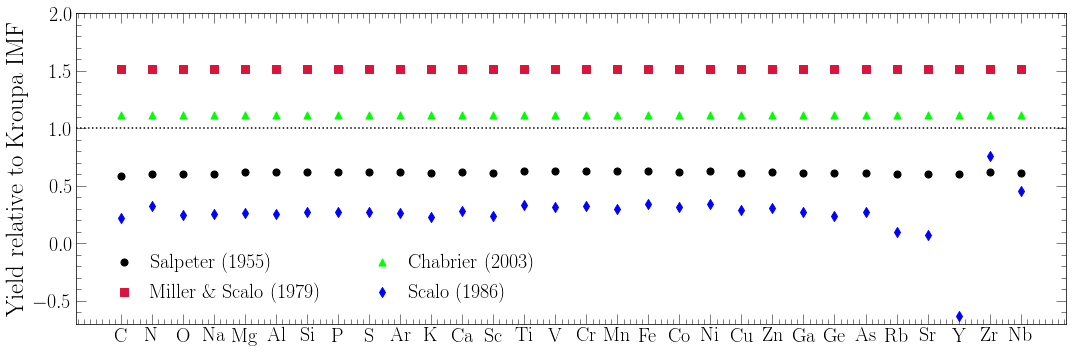

In [21]:
fig = plt.figure(figsize = (15, 5), facecolor = "white")
ax = fig.add_subplot(111)
ax.set_ylabel(r"Yield relative to Kroupa IMF", fontsize = 25)
# ax.scatter(["O", "Fe"], [1, 1])
# ax.set_xlim([-0.2, 1.2])
ax.set_ylim([-0.7, 2])
ax.set_yticks([-0.5, 0, 0.5, 1, 1.5, 2])
ax.tick_params(axis = "x", which = "major", labelsize = 20)
ax.tick_params(axis = "y", which = "major", labelsize = 20)

elements = ["c", "n", "o", "na", "mg", "al", "si", "p", "s", "ar", "k", "ca", "sc", "ti", "v", "cr",
            "mn", "fe", "co", "ni", "cu", "zn", "ga", "ge", "as", "rb", "sr", "y", "zr", "nb"]
elements = [_.capitalize() for _ in elements]

funcs = {
    "salpeter": vice.imf.salpeter,
    "ms79": miller_scalo_1979,
    "chabrier": chabrier_2003,
    "scalo": scalo_1986
}
colors = {
    "salpeter": "black",
    "ms79": "crimson",
    "chabrier": "lime",
    "scalo": "blue"
}
pointstyles = {
    "salpeter": "circle",
    "ms79": "square",
    "chabrier": "triangle_up",
    "scalo": "thin_diamond"
}
labels = {
    "salpeter": "Salpeter (1955)",
    "ms79": "Miller \& Scalo (1979)",
    "chabrier": "Chabrier (2003)",
    "scalo": "Scalo (1986)"
}

ax.axhline(1, c = named_colors()["black"], linestyle = ':')
for elem in elements:
    sys.stdout.write("Element: %s    \r" % (elem))
    yield_kwargs = {
        "study": "S16/W18",
        "IMF": "kroupa",
        "net": True
    }
    norm, _ = vice.yields.ccsne.fractional(elem, **yield_kwargs)
    for IMF in funcs.keys():
        yield_kwargs["IMF"] = funcs[IMF] if IMF != "salpeter" else "salpeter"
        y, _ = vice.yields.ccsne.fractional(elem, **yield_kwargs)
        scatter_kwargs = {
            "c": colors[IMF],
            "marker": markers()[pointstyles[IMF]],
            "s": 50
        }
        if elem == "O": scatter_kwargs["label"] = labels[IMF]
        # plt.scatter(["O"], [yield])
        # plt.scatter(["N"], [yield], color = "r", ...)
        # plt.scatter(["N", "O", ...], [yield_of_n, yield_of_o, ...], ...)
#         ax.scatter([elem], [y / norm], **scatter_kwargs)
#         ax.errorbar(xvals, yvals, xerr = somelist, yerr = None)
sys.stdout.write("\n")
        
kwargs = {
    "loc": mpl_loc("lower left"),
    "ncol": 2,
    "bbox_to_anchor": (0.01, 0.01),
    "fontsize": 20
}
leg = ax.legend(**kwargs)

plt.tight_layout()
plt.savefig("../latex/yields-onezone/yields_relative_to_kroupa.pdf")
plt.show()

7.349940819689897e-11
-4.648083401647928e-11


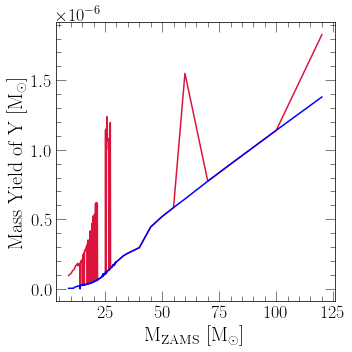

In [30]:
element = "Y"

fig = plt.figure(figsize = (5, 5), facecolor = "white")
ax = fig.add_subplot(111)
ax.set_xlabel(r"M$_\text{ZAMS}$ [M$_\odot$]")
ax.set_ylabel(r"Mass Yield of %s [M$_\odot$]" % (element.capitalize()))

table_total = vice.yields.ccsne.table(element, study = "S16/W18", wind = True)
table_nowind = vice.yields.ccsne.table(element, study = "S16/W18", wind = False)

wind = [table_total[mass] - table_nowind[mass] for mass in table_total.masses]
total = [table_total[mass] for mass in table_total.masses]

ax.plot(table_total.masses, total, c = named_colors()["crimson"])
ax.plot(table_total.masses, wind, c = named_colors()["blue"])

y_kroupa, _ = vice.yields.ccsne.fractional(element, study = "S16/W18")
y_scalo, _ = vice.yields.ccsne.fractional(element, study = "S16/W18", IMF = scalo_1986)
print(y_kroupa)
print(y_scalo)

plt.tight_layout()
plt.show()

In [11]:
class exponential:
    
    def __init__(self, norm = 10, timescale = 1):
        self.norm = norm
        self.timescale = timescale
        
    def __call__(self, time):
        return self.norm * np.exp(-time / self.timescale)
    
class linear_exponential(exponential):
    
    def __call__(self, time):
        return time * super().__call__(time)

IMF: Kroupa (2001)
CCSN O yield: 5.707e-03
CCSN Fe yield: 4.722e-04
SN Ia Fe yield: 8.149e-04
IMF: Salpeter (1955)
CCSN O yield: 3.446e-03
CCSN Fe yield: 2.955e-04
SN Ia Fe yield: 4.817e-04
IMF: Miller \& Scalo (1979)
CCSN O yield: 8.652e-03
CCSN Fe yield: 7.159e-04
SN Ia Fe yield: 1.235e-03
IMF: Chabrier (2003)
CCSN O yield: 6.348e-03
CCSN Fe yield: 5.252e-04
SN Ia Fe yield: 9.064e-04
IMF: Scalo (1986)
CCSN O yield: 1.401e-03
CCSN Fe yield: 1.616e-04
SN Ia Fe yield: 1.545e-04


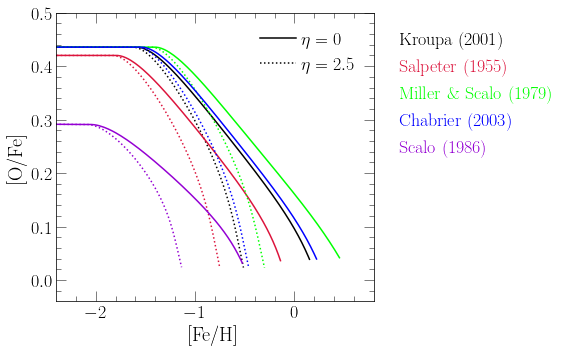

In [10]:
fig = plt.figure(figsize = (8, 5), facecolor = "white")
ax = fig.add_subplot(111)
ax.set_xlabel("[Fe/H]")
ax.set_ylabel("[O/Fe]")
ax.set_xlim([-2.4, 0.8])
ax.set_ylim([-0.04, 0.5])

IMFs = ["kroupa", "salpeter", miller_scalo_1979, chabrier_2003, scalo_1986]
labels = {
    "kroupa": "Kroupa (2001)",
    "salpeter": "Salpeter (1955)",
    miller_scalo_1979: "Miller \& Scalo (1979)",
    chabrier_2003: "Chabrier (2003)",
    scalo_1986: "Scalo (1986)"
}
colors = {
    "kroupa": "black",
    "salpeter": "crimson",
    miller_scalo_1979: "lime",
    chabrier_2003: "blue",
    scalo_1986: "darkviolet"
}

line1 = ax.plot([-10, -9], [-10, -9], c = named_colors()["black"], linestyle = '-', label = r"$\eta = 0$")[0]
line2 = ax.plot([-10, -9], [-10, -9], c = named_colors()["black"], linestyle = ':', label = r"$\eta = 2.5$")[0]
kwargs = {
    "loc": mpl_loc("upper right"),
    "ncol": 1,
    "bbox_to_anchor": (0.99, 0.99)
}
leg2 = ax.legend(**kwargs)
ax.add_artist(leg2)
line1.remove()
line2.remove()

with vice.singlezone(name = "tmp") as sz:
    sz.elements = ["fe", "o"]
#     sz.eta = 0
#     sz.eta = 2.5
    sz.func = lambda t: 10
    sz.mode = "sfr"
    for imf in IMFs:
        kwargs = {
            "study": "S16/W18",
            "IMF": imf
        }
        vice.yields.ccsne.settings['o'], _ = vice.yields.ccsne.fractional('o', **kwargs)
        vice.yields.sneia.settings['o'] = 0
        vice.yields.ccsne.settings['fe'], _ = vice.yields.ccsne.fractional('fe', **kwargs)
        vice.yields.sneia.settings['fe'] = vice.yields.ccsne.settings['o'] * vice.solar_z['fe'] / vice.solar_z['o']
        vice.yields.sneia.settings['fe'] -= vice.yields.ccsne.settings['fe']
#         sys.stdout.write("IMF: %s                      \r" % (labels[imf]))
        print("IMF: %s" % (labels[imf]))
        print("CCSN O yield: %.3e" % (vice.yields.ccsne.settings['o']))
        print("CCSN Fe yield: %.3e" % (vice.yields.ccsne.settings['fe']))
        print("SN Ia Fe yield: %.3e" % (vice.yields.sneia.settings['fe']))
        sz.eta = 2.5
        sz.IMF = imf
        out = sz.run(np.linspace(0, 10, 1001), overwrite = True, capture = True)
        kwargs = {
            "c": named_colors()[colors[imf]],
#             "label": labels[imf]
            "linestyle": ':'
        }
        ax.plot(out.history["[fe/h]"], out.history["[o/fe]"], **kwargs)
        sz.eta = 0
        out = sz.run(np.linspace(0, 10, 1001), overwrite = True, capture = True)
        kwargs["linestyle"] = '-'
        kwargs["label"] = labels[imf]
        ax.plot(out.history["[fe/h]"], out.history["[o/fe]"], **kwargs)
#     sys.stdout.write("\n")

kwargs = {
    "loc": mpl_loc("upper left"),
    "ncol": 1,
    "handlelength": 0,
    "bbox_to_anchor": (1.01, 0.99)
}
leg = ax.legend(**kwargs)
fancy_legend(leg, [colors[_] for _ in IMFs])

plt.tight_layout()
plt.savefig("../latex/yields-onezone/onezone_different_imfs.pdf")
plt.show()

In [12]:
yo, _ = vice.yields.ccsne.fractional('o', study = "WW95", IMF = scalo_1986)
yfe, _ = vice.yields.ccsne.fractional('fe', study = "WW95", IMF = scalo_1986)
print("%.3g" % (np.log10(yo / yfe) - np.log10(vice.solar_z['o'] / vice.solar_z['fe'])))

0.531


/var/folders/1p/lm_h7y810f9_7ygnvr2tjc_w0000gn/T/ipykernel_31283/468636239.py:1: ScienceWarning: Supernovae yields from the Woosley & Weaver (1995) ApJ, 101, 181 study are sampled on a grid of stellar masses up to 40 Msun at this metallicity. Employing an upper mass limit larger than this may introduce numerical artifacts. Got: 100 Msun
  yo, _ = vice.yields.ccsne.fractional('o', study = "WW95", IMF = scalo_1986)
/var/folders/1p/lm_h7y810f9_7ygnvr2tjc_w0000gn/T/ipykernel_31283/468636239.py:1: ScienceWarning: Woosley & Weaver (1995) did not report their birth abundances. VICE cannot compute net yields for this study, only reporting gross yields.
  yo, _ = vice.yields.ccsne.fractional('o', study = "WW95", IMF = scalo_1986)
/var/folders/1p/lm_h7y810f9_7ygnvr2tjc_w0000gn/T/ipykernel_31283/468636239.py:2: ScienceWarning: Supernovae yields from the Woosley & Weaver (1995) ApJ, 101, 181 study are sampled on a grid of stellar masses up to 40 Msun at this metallicity. Employing an upper mass li